# Project Title: Tele2 Cost Optimization

Project Description: https://youtrack.geox.ws/issue/CR-135

# Import Modules

In [1]:
import os
import sys
import warnings
import numpy as np
import pandas as pd
import datetime as dt
from PIL import Image
from credentials import *
from Queries.tele2 import *
sys.path.append(project_path)
from urllib.request import urlopen
from ClassLibify.main import DataExtractor

# Options and Settings

In [2]:
%matplotlib inline
warnings.simplefilter("ignore")    
pd.set_option("expand_frame_repr", True)
np.set_printoptions(precision=4, suppress=True)

# Load Image

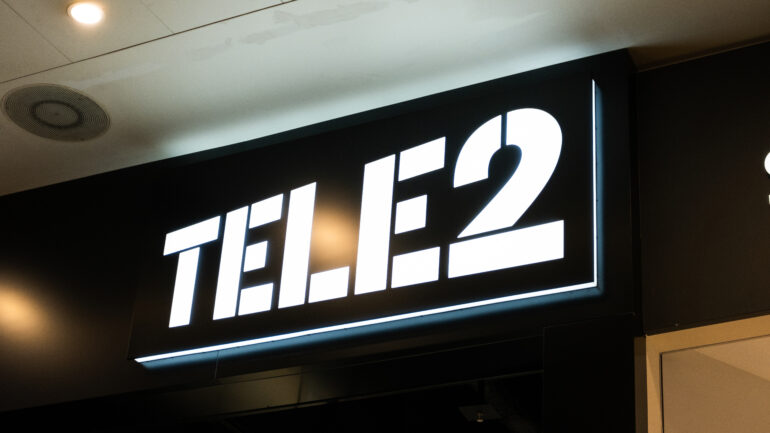

In [3]:
image_url = "https://geenius.ee/app/uploads/sites/7/2020/03/a5ac9485f7a1d75a7df64ad58c2513ce-770x433.jpg"
Image.open(fp=urlopen(f"{image_url}"))

# Fetch Data

In [4]:
df_tele2 = DataExtractor().get_data_repo_db(query1)
df_tele2.head()

customer_id       customer_name product device_name device_type  \
0    1375738.0        Barbara Bene   Mobil        GeoX         GC5   
1    1375764.0       Helga Tintrup   Mobil        GeoX         GC5   
2    1375804.0   Maria Stache-Nitz   Mobil        GeoX         GC5   
3    1375808.0     Gudrun Weidlich   Mobil        GeoX         GC5   
4    1375810.0  Marlies Schmedding   Mobil        GeoX         GC5   

  serial_number                 iccid  sim_rn            imei  \
0    GC5-036844  89462038005003457182       1  35289006248571   
1    GC5-102461  89462038043022727855       1  35289006522239   
2    GC5-031463  89462038043022640579       1  35289006090699   
3    GC5-039721  89462038043013203809       1  35289006319665   
4    GC5-033536  89462038043000987398       1  35289006172693   

    proprietor_name  ...  data_overcharge_cost  sim_max_sms  sms_sent  \
0             Arkea  ...                   NaN         10.0        12   
1             Arkea  ...                   NaN         10.0         5   
2  Libify_ExKineo23  ...                   NaN         10.0         2   
3             Arkea  ...                   NaN         10.0         0   
4              None  ...                   NaN         10.0         0   

   sim_sms_rem  sms_overcharge_cost  sim_max_voice  voice_used_mins  \
0         -2.0                -0.12            0.5              0.0   
1          5.0                  NaN            0.5              0.0   
2          8.0                  NaN            0.5              0.0   
3         10.0                  NaN            0.5              0.0   
4         10.0                  NaN            0.5              0.0   

   sim_voice_rem  voice_overcharge_cost  sim_card_date  
0            0.5                    NaN     2024-01-31  
1            0.5                    NaN     2024-01-31  
2            0.5                    NaN     2024-01-31  
3            0.5                    NaN     2024-01-31  
4            0.5                    NaN     2024-01-31  

[5 rows x 24 columns]

# Write Output

In [5]:
with pd.ExcelWriter(os.path.join(task_output, "Tele2.xlsx"), engine="openpyxl") as writer:
  df_tele2.to_excel(writer, sheet_name="Aktivierte SIM-Info", index=False)